1. 코사인 유사도(Cosine Similarity) 

두 벡터간의 코사인 각도를 이용해 구할 수 있는 두 벡터의 유사도

- 방향이 동일: 1, 90도: 0, 180도: -1

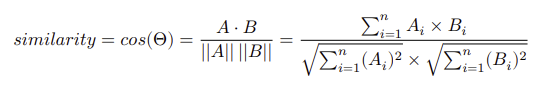

In [1]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cos_sim(A, B):
  return dot(A, B)/(norm(A)*norm(B))

doc1 = np.array([0,1,1,1])
doc2 = np.array([1,0,1,1])
doc3 = np.array([2,0,2,2])

print('문서 1과 문서2의 유사도 :',cos_sim(doc1, doc2))
print('문서 1과 문서3의 유사도 :',cos_sim(doc1, doc3))
print('문서 2와 문서3의 유사도 :',cos_sim(doc2, doc3))

문서 1과 문서2의 유사도 : 0.6666666666666667
문서 1과 문서3의 유사도 : 0.6666666666666667
문서 2와 문서3의 유사도 : 1.0000000000000002


2. 유사도를 이용한 추천 시스템 구현하기 

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

data = pd.read_csv('movies_metadata.csv', low_memory=False)
data.head(2)

In [ ]:
data = data.head(20000)   # 상위 2만개의 샘플을 data에 저장장

In [ ]:
print('overview 열의 결측값의 수:',data['overview'].isnull().sum())
# overview 열에 존재하는 모든 결측값을 전부 카운트하여 출력 

In [ ]:
data['overview'] = data['overview'].fillna('')

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['overview'])
print('TF-IDF 행렬의 크기(shape) :',tfidf_matrix.shape)

In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print('코사인 유사도 연산 결과 :',cosine_sim.shape)

In [ ]:
title_to_index = dict(zip(data['title'], data.index))
idx = title_to_index['Father of the Bride Part II']
print(idx)

In [ ]:
def get_recommendations(title, cosine_sim=cosine_sim):
  idx = title_to_index[title]
  sim_scores = list(enumerate(cosine_sim[idx]))
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
  sim_scores = sim_scores[1:11]
  movie_indices = [idx[0] for idx in sim_scores]
  return data['title'].iloc[movie_indices]

get_recommendations('The Dark Knight Rises')